<h1>ASSIGNMENT 1 <br>
    DATA ACQUISITION & TRANSFORMATION</h1>
<table align="left">
<tbody>
<tr>
<td style="width: 60%;">
<p>Presented by: Nathan Saric </p>
<p>Presented to: The Shoe Factory </p>
<p>Dataset used: <a href="https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset"> Online Shoppers Purchasing Intention Dataset</a></p>
<p>Algorithm used: Classification </p>
</td>
<td style="width: 40%;">
<p>Weights</p>
<p>BUSINESS - 35%</p>
<p>TECHNICAL - 50%</p>
<p>PROFESSIONALISM - 15%</p>
</td>
</tr>
</tbody>
</table>

<h2>Company Description</h2>
<p style="text-align: justify;"> The Shoe Factory is an online footwear company founded in January 2021 that follows a business-to-consumer ecommerce business model. The company's vision is to become one of the leading brands in the online footwear industry in Canada and to establish a simple yet unique customer experience through their ecommerce platform. The company seeks to offer and make available an extensive range of footwear from a wide variety of shoe manufacturing brands at affordable prices to fulfill and exceed their customer expectations. The Shoe Factory's organizational values comprise of honesty, diversity, innovation, and reliability. The company's primary value driver is technological expertise through their increased efforts towards research and development. Additionally, their product offering successfully captures the evolving footwear market environment paired with the growing health and wellness trend across the globe. Today, consumers are increasingly buying comfortable footwear, especially online, due to the emerging digital landscape. The Shoe Factory aims to provide an all-in-one convenient online interface to address customers' footwear needs. </p>

<h2>Problem Definition</h2>
<p style="text-align: justify;"> Having operated for roughly one year, The Shoe Factory has been able to identify strengths and weaknesses regarding the company's website. In their first year of operations, the company heavily promoted their website through social media marketing and received overwhelmingly positive attention and engagement from its target audience. However, the company observed a fairly poor conversion rate. This rate indicates the percentage of sales divided by the percentage of visitors for a given time period. A poor conversion rate may signal that customers are not interacting with your website as intended or face unforeseen complications or inconveniences during their experience. As a result, The Shoe Factory's reliability and innovation were hindered due to the discrepancy between the company's offering and the customer's expectations. The Shoe Factory has invested in Google Analytics to collect relevant website data in hopes of a) better identifying the types of visitors that will result in a sale, and b) ultimately improving the website's conversion rate. </p>

<p style="text-align: justify;"> In this notebook, we explore the data relating to customer behaviour in the e-commerce setting in an attempt to provide insights and actionable strategies on how the website can increase the likelihood of transactions leading to increased revenue. We begin by exploring the dataset, understanding the attributes, and visualizing any initial relationships in the data. Subsequently, we build and train a machine learning classification algorithm to predict whether or not a visitor will purchase from the website. Finally, we offer suggestions that aim to improve the website's conversion rate thus increasing revenue, with customer intention and behaviour at the core of the advice. </p>

<h2>Data Evaluation</h2>
<p style="text-align: justify;"> We first import several libraries that will allow us to manipulate and visualize the data. The provided URL links to the <em>"Online Shoppers Purchasing Intention"</em> dataset CSV file. This URL may be modified to accept a CSV file of a similar structure. For example, The Shoe Factory may choose to supply an updated dataset with more recent observations that reflect the website's performance during 2022 - 2023.</p>

In [26]:
# Importing the libraries needed to work with the dataset
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'

# Reading in the dataset
df_online = pd.read_csv(url, ',')

<p style="text-align: justify;"> The dataset contains 18 attributes -- 10 numerical and 8 categorical attributes -- and 12,330 observations. The final attribute, <em>Revenue</em>, is a boolean attribute that will be the target variable which we later try to predict using the other 17 attributes. The first 6 attributes represent the different web pages (<em>Administrative</em>, <em>Informational</em>, and <em>ProductRelated</em>) along with the time duration spent on each corresponding page by the visitor. The subsequent 3 attributes represent metrics used by Google Analytics in website traffic analysis. <em>BounceRates</em> refers to the percentage of visitors who enter the website and then leave rather than viewing any further pages. <em>ExitRates</em> refers to the percentage of visitors that exit the website from a given page. <em>PageValues</em> refers to the monetary performance of a given page based on whether or not it led to a transaction. Next, <em>SpecialDay</em> indicates the proximity of a special calendar day such as a holiday. Similarly, <em>Month</em> represents the month of the year in which the observation occurred. The next 5 attributes represent various information pertaining to the visitor upon accessing the website, including <em>OperatingSystem</em>, <em>Browser</em>, <em>Region</em>, <em>TrafficType</em>, and <em>VisitorType</em>. Note that there exist three types of visitors: Returning, New, and Other. Finally, the 17th attribute, <em>Weekend</em>, is a boolean attribute that indicates whether the observation occurred on a weekend or weekday. </p>

In [2]:
# Displaying some information about the structure of the dataset
df_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [3]:
# Displaying the first ten rows of the dataset
df_online.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [4]:
# Displaying the summary statistics for all of the attributes in the dataset
df_online.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


<p style="text-align: justify;"> We observe the proportionality of data and can calculate The Shoe Factory's current conversion rate. Of the 12,330 observations, 1,908 transactions occurred, yielding a conversion rate of ~15.47%. One of the challenges that arise in website traffic analysis data is the inherent lack of proportionality. From the bar plot below, we see that the class labels for the target variable are heavily imbalanced because roughly 15% of the observations lead to a purchase whereas the remaining 85% of observations lead to no purchase. Note that the imbalanced nature of the dataset will also be reflected when the dataset is partitioned into training and testing sets. If we wanted to, we could sample the data such that the class labels are more balanced, however, this would inaccurately reflect the true data that is collected from the website. Moreover, making predictions against an imbalanced dataset can sometimes be misleading. For example, high levels of accuracy exhibited by the classification algorithm can be attributed to always predicting that there will be no transaction. Since approximately 85% of the observations resulted in no transaction, the machine learning algorithm could predict <em>False</em> 100% of the time and yet produce an accuracy of 85%. This challenge will further be addressed when tuning the model. </p>

False    10422
True      1908
Name: Revenue, dtype: int64


<AxesSubplot:xlabel='Revenue', ylabel='count'>

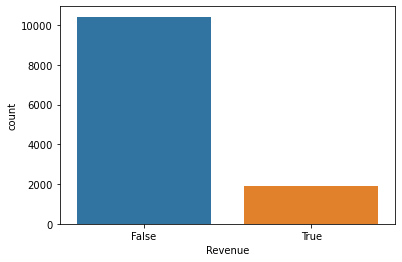

In [5]:
# Visualizing the proportionality of the target attribute of the dataset
print(df_online['Revenue'].value_counts())
sb.countplot(x='Revenue', data=df_online)

<p style="text-align: justify;"> We examine the correlation matrix to highlight any relationships that already exist among the attributes. We notice that <em>PageValues</em> is positively correlated with the target variable, <em>Revenue</em>, whereas <em>BounceRates</em> and <em>ExitRates</em> are negatively correlated to <em>Revenue</em>. This demonstrates that a transaction is less likely to take place when a visitor is more likely to leave the website. Furthermore, <em>Revenue</em> is more closely correlated with <em>ProductRelated</em> webpages rather than <em>Administrative</em> and <em>Informational</em> webpages. </p>

<AxesSubplot:>

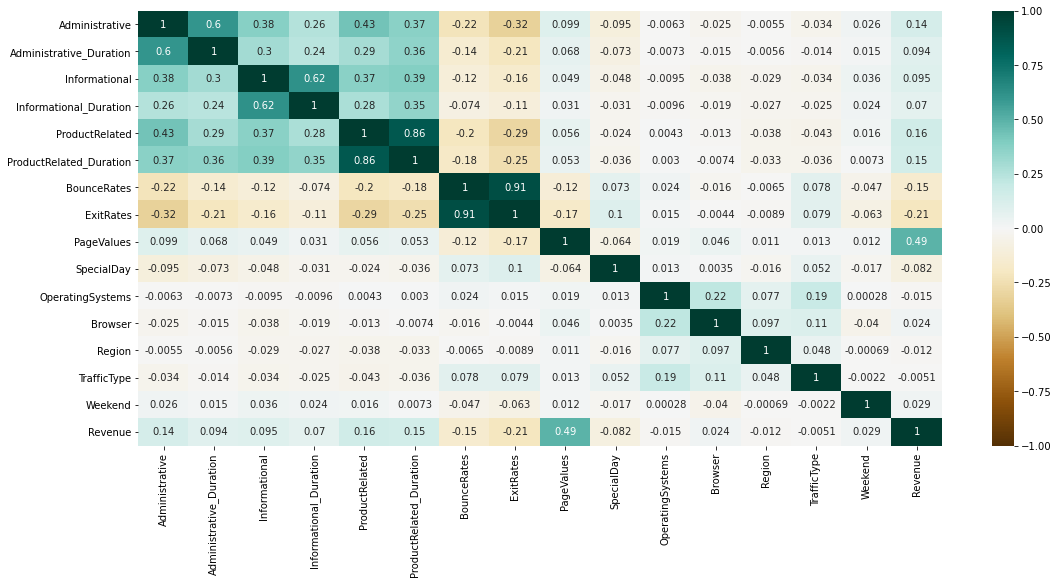

In [27]:
# Producing a confusion matrix or heat map of the dataset 
plt.figure(figsize=(18,8))
sb.heatmap(df_online.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

<p style="text-align: justify;"> We observe the frequencies of the categorical attributes and immediately, notice that there were no observations during January and April. Conversely, May and November were the months with the greatest number of observations. From the following frequencies, we can begin to profile the average website visitor such that they are a returning visitor, visiting the website on a weekday with Operating System 2, using Browser 2, from Region 1, and classified as Traffic Type 1. Furthermore, we note that the proportionality of the Weekend attribute suggests that the day of the week is not particularly correlated to the Revenue attribute. Two of the seven days of the week are considered the weekend, or alternatively ~28.6% of the weekdays. Similarly, 2,868 of the 12,330 observations occurred on a weekend, yielding a rate of ~23.3%. </p>


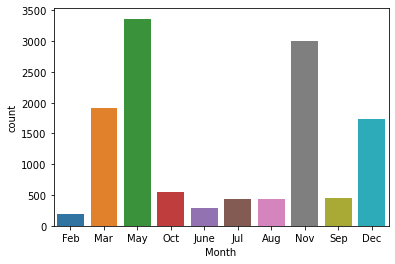

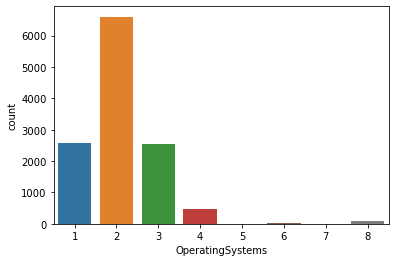

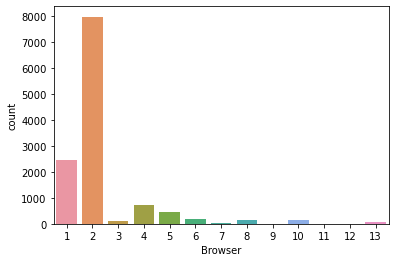

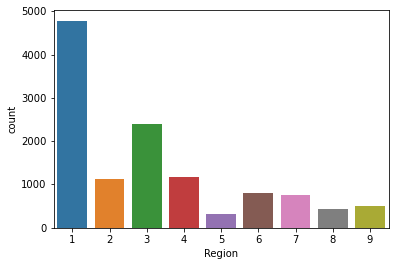

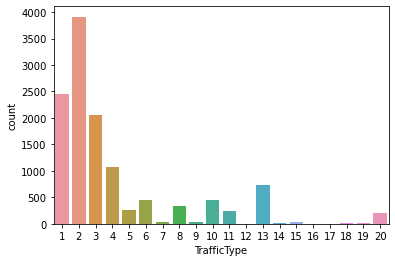

In [7]:
# Producing several histograms to visualize the frequency or distribution of the categorical attributes of the dataset
attributes = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
for i, col in enumerate(attributes):
    plt.figure(i)
    sb.countplot(x=col, data=df_online)

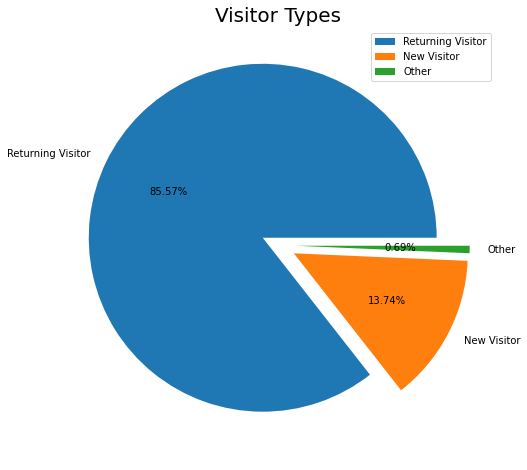

In [8]:
# Producing a pie chart to visualize the percentage of each type of visitor
plt.figure(figsize=(10,8))
size = np.array(df_online['VisitorType'].value_counts())
labels = ['Returning Visitor', 'New Visitor', 'Other']
plt.pie(size, labels = labels, explode = [0.1, 0.1, 0.1], autopct = '%.2f%%')
plt.title('Visitor Types', fontsize = 20)
plt.legend()

False    9462
True     2868
Name: Weekend, dtype: int64


<AxesSubplot:xlabel='Weekend', ylabel='count'>

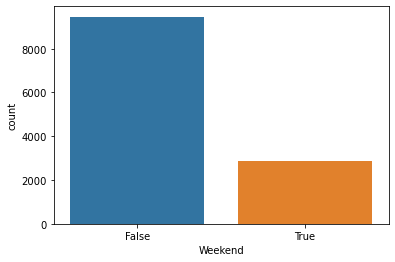

In [9]:
# Visualizing the proportionality of the Weekend attribute in the dataset
print(df_online['Weekend'].value_counts())
sb.countplot(x='Weekend', data=df_online)

<h2>Data Transformation</h2>
<p style="text-align: justify;"> We check for missing values in the dataset and find that this dataset has no missing values. In the event of a missing value, due to the large number of observations recorded, it would be reasonable to simply discard the observation. Next, we label encode to the <em>Revenue</em> and <em>Weekend</em> attribute to modify their data type from boolean (True or False) to numerical (1 or 0). Furthermore, we apply one hot encoding to the <em>Month</em> and <em>VisitorType</em> attributes to convert the categorical data to a series of binary columns for each category, in an attempt to improve the classification accuracy of the machine learning model. Finally, we manually add two new columns to the dataset, namely the months of January and April, since the original dataset did not have any observations recorded during these months. This is an important transformation since new observations may occur during these months and, therefore, the dataset should be structured in such a way to exhaustively handle all of the possibilities. </p>


In [10]:
# Checking the dataset for missing values in any of the attributes
df_online.isnull().sum()

# In the event of a missing value, discard the observation from the dataset
#df_online.dropna()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [11]:
# Label Encoding the Revenue and Weekend attributes from True/False to 1/0
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

df_online['Revenue'] = lb.fit_transform(df_online['Revenue'])
df_online['Weekend'] = lb.fit_transform(df_online['Weekend'])

# One Hot Encoding the Month and VisitorType attributes
df_online = pd.get_dummies(df_online)

# Manually adding One Hot Encoding for the months of January and April
df_online['Month_Jan'] = 0
df_online['Month_Apr'] = 0

In [12]:
corr_matrix = df_online.corr()
corr_matrix['Revenue'].sort_values(ascending=False)

Revenue                          1.000000
PageValues                       0.492569
ProductRelated                   0.158538
Month_Nov                        0.154774
ProductRelated_Duration          0.152373
Administrative                   0.138917
VisitorType_New_Visitor          0.104136
Informational                    0.095200
Administrative_Duration          0.093587
Informational_Duration           0.070345
Month_Oct                        0.032666
Weekend                          0.029295
Browser                          0.023984
Month_Sep                        0.019983
Month_Aug                        0.010959
VisitorType_Other                0.007715
Month_Jul                       -0.001036
TrafficType                     -0.005113
Region                          -0.011595
OperatingSystems                -0.014668
Month_June                      -0.023112
Month_Dec                       -0.033112
Month_Feb                       -0.047114
Month_Mar                       -0

<p style="text-align: justify;"> We now transform the data so that it is compatible with the Amazon Sagemaker Environment. We reindex the dataset such that the target attribute is in the first column. We then decompose the dataset into its independent variables and dependent variables. We use <em>train_test_split</em> from the <em>sklearn</em> library to partition the data into an 80% training set and a 20% testing set. This partitioning may be modified by supplying a different value to the <em>test_size</em> argument in <em>train_test_split</em>. Lastly, we save the two dataframe splits to individual CSV files, without an index or a header, to be later supplied to the machine learning algorithm. </p>

In [13]:
# Reordering the columns of the dataset so that the target variable is in the first column
new_column_order = ['Revenue', 'Administrative', 'Administrative_Duration', 'Informational', 
'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 
'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 
'Month_Jan', 'Month_Feb', 'Month_Mar', 'Month_Apr', 'Month_May', 'Month_June', 'Month_Jul', 
'Month_Aug', 'Month_Sep', 'Month_Oct', 'Month_Nov', 'Month_Dec', 'VisitorType_Returning_Visitor',
'VisitorType_New_Visitor', 'VisitorType_Other']

df_online = df_online.reindex(columns=new_column_order)

# Display the first ten rows of the dataset to ensure that all transformations have been properly implemented
df_online.head(10)

,Revenue,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,...,Month_June,Month_Jul,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec,VisitorType_Returning_Visitor,VisitorType_New_Visitor,VisitorType_Other
0,0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,...,0,0,0,0,0,0,0,1,0,0
7,0,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
# x contains all of the independent variables
# y contains all of the dependent variables
x = df_online.drop(['Revenue'], axis=1)
y = df_online['Revenue']

# The shape of x and y should have the same number of rows
print("x:", x.shape)
print("y:", y.shape)

x: (12330, 30)
y: (12330,)


In [15]:
from sklearn.model_selection import train_test_split 

# x_train: 80% of independent variables used to train the model
# x_test: 20% of independent variables used to test the model
# y_train: dependent variables used to train the model
# y_test: dependent variables used to test the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# The shape of x_train and y_train should have the same number of rows
# Similarly, the shape of x_test and y_test should have the same number of rows
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (9864, 30)
y_train: (9864,)
x_test: (2466, 30)
y_test: (2466,)


In [16]:
# Combining the four partitioned datasets into the appropriate training and testing sets
train_set = pd.DataFrame(x_train, columns=new_column_order[1:])
train_set.insert(0, 'Revenue', y_train)

test_set = pd.DataFrame(x_test, columns=new_column_order[1:])
test_set.insert(0, 'Revenue', y_test)

# Saving the training and testing dataframes to individual CSV files without an index or a header
train_set.to_csv('df_online_train.csv', index=False, header=False)
test_set.to_csv('df_online_test.csv', index=False, header=False)

<h2>Build and Train the Model</h2>
<p style="text-align: justify;"> We initialize and configure a new Amazon Sagemaker Session and save the training and testing CSV files to an Amazon Sagemaker S3 Bucket. We are now ready to use Amazon Sagemaker's Linear Learner algorithm. For this business problem, we will be using the supervised learning algorithm to solve the outlined classification problem. Note that it is important to specify in the Estimator's objects' <em>set_hyperparameters</em> function that the <em>predictor_type</em> is a <em>binary_classifier</em>. This will allow the model to output the predicted class label. In our context, an output of 0 indicates that the <em>Revenue</em> is predicted to be <em>False</em>. On the other hand, an output of 1 indicates that the <em>Revenue</em> is predicted to be <em>True</em>. We now tune the model by supplying a <em>learning_rate</em> of 0.1 and a <em>mini_batch_size</em> of 800. The learning rate hyperparameter controls the speed at which the model learns, specifically, in response to the estimated error at the end of each batch of training examples. Since we have a fairly large dataset, we set the batch size to 1,024.</p>

<p style="text-align: justify;"> Moreover, the <em>binary_classifier_model_selection_criteria</em> argument in the <em>set_hyperparameters</em> function represents the model evaluation criteria for the training dataset. <br />The Amazon Web Services documentation states that this criterion has a default value of accuracy. However, the valid values include <em>accuracy</em>, <em>f_beta</em>, <em>precision_at_target_recall</em>, <em>recall_at_target_precision</em>, or <em>loss_function</em>. Here we address the aforementioned challenge presented by the imbalanced dataset by further tuning the Linear Learner criteria to select the model with the maximum F1-score. Note that F1-scores can be interpreted as a weighted average of the precision and recall values with a maximum score of 1 and a minimum score of 0. </p>

In [17]:
# Saving the generated training and testing CSV files to an Amazon Sagemaker S3 Bucket
import sagemaker
sess = sagemaker.Session() 
bucket = sess.default_bucket()
prefix = 'online_shoppers_purchasing_intention' 
train_path = sess.upload_data(path='df_online_train.csv', key_prefix=prefix + '/input/training') 
test_path = sess.upload_data(path='df_online_test.csv', key_prefix=prefix + '/input/testing') 

print(train_path)
print(test_path)

s3://sagemaker-us-east-1-809557489039/online_shoppers_purchasing_intention/input/training/df_online_train.csv
s3://sagemaker-us-east-1-809557489039/online_shoppers_purchasing_intention/input/testing/df_online_test.csv


In [18]:
from sagemaker import get_execution_role
from sagemaker.image_uris import retrieve
from sagemaker.estimator import Estimator 

region = sess.boto_session.region_name
container = retrieve('linear-learner', region)

# Initializing and configure the Amazon Sagemaker Linear Learner Algorithm
ll_estimator = Estimator(container, role=sagemaker.get_execution_role(), instance_count=1, instance_type='ml.m5.large', output_path='s3://{}/{}/output'.format(bucket, prefix))

In [19]:
# Setting the hyperparameters for the Amazon Sagemaker Linear Learner Algorithm
ll_estimator.set_hyperparameters(
    predictor_type='binary_classifier', 
    mini_batch_size=1024, 
    learning_rate=0.1,
    binary_classifier_model_selection_criteria='f_beta')

In [20]:
# Defining the training and testing data channels
from sagemaker import TrainingInput 
train_data_channel = TrainingInput(s3_data=train_path, content_type='text/csv') 
test_data_channel = TrainingInput(s3_data=test_path, content_type='text/csv')

In [21]:
# Launching the training job by supplying the training and testing data channels to the fit() API.
ll_estimator.fit({'train': train_data_channel, 'test': test_data_channel})

2022-02-28 04:31:10 Starting - Starting the training job...
2022-02-28 04:31:12 Starting - Launching requested ML instancesProfilerReport-1646022670: InProgress
.........
2022-02-28 04:33:03 Starting - Preparing the instances for training............
2022-02-28 04:35:04 Downloading - Downloading input data...
2022-02-28 04:35:30 Training - Training image download completed. Training in progress.Docker entrypoint called with argument(s): train
Running default environment configuration script
[02/28/2022 04:35:34 INFO 140080292689728] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'i

<h2>Deploy the Model</h2>
<p style="text-align: justify;"> We are ready to deploy our model in Amazon Sagemaker. We configure and launch a new training job and concatenate a date/time stamp to the generated endpoint name. Note that we will use a smaller instance to save money. </p>

In [22]:
# Deploying the model and concatenating a date/time stamp
from time import strftime, gmtime 
timestamp = strftime('%d-%H-%M-%S', gmtime()) 
endpoint_name = 'linear-learner-model-' + timestamp 

ll_predictor = ll_estimator.deploy(endpoint_name=endpoint_name, initial_instance_count=1, instance_type='ml.t2.medium')

print(endpoint_name)

----------!linear-learner-model-28-04-36-24


<h2>Test the Model</h2>
<p style="text-align: justify;"> Below we create a test observation to supply as input to the algorithm. The 30 attributes listed must be set to an appropriate value. These constraints ensure that the structure of the test observation matches the expected input from the algorithm. An example observation has been provided below. Alternatively, an entire CSV dataset file may be passed in and properly parsed such that each line represents a single observation. </p>

<p style="text-align: justify;"> We see that for the given observation, the model predicted the <em>Revenue</em> to be <em>False</em>. Moreover, we note that the model's classification accuracy rate is roughly 90% however the F1-score is 63% which was to be expected from previous discussions. </p>

In [23]:
ll_predictor.serializer = sagemaker.serializers.CSVSerializer() 
ll_predictor.deserializer = sagemaker.deserializers.CSVDeserializer() 

In [24]:
# Creating a test_sample to supply to the trained classification model
Administrative                  = 6             # ANY DECIMAL VALUE
Administrative_Duration         = 52            # ANY DECIMAL VALUE
Informational                   = 1             # ANY DECIMAL VALUE
Informational_Duration          = 24            # ANY DECIMAL VALUE
ProductRelated                  = 356           # ANY DECIMAL VALUE
ProductRelated_Duration         = 3763.17       # ANY DECIMAL VALUE

BounceRates                     = 0.00338983    # ANY DECIMAL VALUE BETWEEN 0 AND 1
ExitRates                       = 0.01480226    # ANY DECIMAL VALUE BETWEEN 0 AND 1
PageValues                      = 10.3704237    # ANY DECIMAL VALUE

SpecialDay                      = 0             # ANY DECIMAL VALUE BETWEEN 0 AND 1
OperatingSystems                = 2             # ANY INTEGER VALUE BETWEEN 1 AND 8
Browser                         = 2             # ANY INTEGER VALUE BETWEEN 1 AND 13
Region                          = 1             # ANY INTEGER VALUE BETWEEN 1 AND 9
TrafficType                     = 1             # ANY INTEGER VALUE BETWEEN 1 AND 20
Weekend                         = 0             # 0 OR 1

# ONLY ONE MONTH MAY TAKE ON THE VALUE OF 1 FOR A GIVEN OBSERVATION
Month_Jan                       = 0             # 0 OR 1
Month_Feb                       = 0             # 0 OR 1
Month_Mar                       = 1             # 0 OR 1
Month_Apr                       = 0             # 0 OR 1
Month_May                       = 0             # 0 OR 1
Month_June                      = 0             # 0 OR 1
Month_Jul                       = 0             # 0 OR 1
Month_Aug                       = 0             # 0 OR 1
Month_Sep                       = 0             # 0 OR 1
Month_Oct                       = 0             # 0 OR 1
Month_Nov                       = 0             # 0 OR 1
Month_Dec                       = 0             # 0 OR 1

# ONLY ONE VISITORTYPE MAY TAKE ON THE VALUE OF 1 FOR A GIVEN OBSERVATION
VisitorType_Returning_Visitor   = 1             # 0 OR 1
VisitorType_New_Visitor         = 0             # 0 OR 1
VisitorType_Other               = 0             # 0 OR 1

test_sample = [Administrative, Administrative_Duration, Informational, Informational_Duration,
ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay, 
OperatingSystems, Browser, Region, TrafficType, Weekend, Month_Jan, Month_Feb, Month_Mar,
Month_Apr, Month_May, Month_June, Month_Jul, Month_Aug, Month_Sep, Month_Oct, Month_Nov, Month_Dec, 
VisitorType_Returning_Visitor, VisitorType_New_Visitor, VisitorType_Other]

response = ll_predictor.predict(test_sample)
print(response)

[['0']]


In [25]:
# Tear down the endpoint to avoid unnecessary costs
ll_predictor.delete_endpoint()

<p style="text-align: justify;"> Finally, we return to the purpose of the data exploration: what are the properties of customers associated with eventual buying -- and how can we improve the website so that more visitors will become purchasers? To better understand the demographic of purchasers, we must shift our focus from user-related information, typically in the form of categorical data, to website-related features. Given that the 12,330 observations were collected over the span of one year, this illustrates the magnitude of traffic the company's website can generate. With a high volume of user traffic and a fairly low conversion rate, there must exist a great range of diversity among the types of visitors the website encounters. Therefore, it is illogical to try and profile the average purchaser and promote such users to the website. Instead, we should treat all website visitors as potential purchasers and focus our efforts on improving the attractiveness and convenience of the website to improve its conversion rate in order to further drive revenue. </p>
    
<p style="text-align: justify;"> Facilitating the flow of traffic on the website to the transaction “hot spots” will improve the website’s revenue, in addition to providing a more seamlessly integrated user experience. Additionally, reducing the number of pages that are more prone to increase <em>ExitRates</em> and <em>BounceRates</em> will help to retain visitors on the web pages that actually matter and drive revenue. For example, we also discovered that <em>ProductRelated</em> web pages (along with their duration) were the most correlated to <em>Revenue</em> of the three types of web pages. Ultimately, increasing the duration and frequency of visits to these web pages will enhance the website’s overall conversion rate. </p>

<h2>Sources</h2>
<p style="text-align: justify;"> The following Kaggle link has a similar exploration of the dataset, entirely through Python using a Pandas dataframe. I browsed through their analysis and was inspired by several of their visualization techniques. </p>
<p><a href="https://www.kaggle.com/roshansharma/online-shopper-s-intention"> https://www.kaggle.com/roshansharma/online-shopper-s-intention </a></p> 

</br>

<p style="text-align: justify;"> The following Amazon Web Services documentation for Sagemaker was useful when initializing, configuring, and troubleshooting the Amazon Sagemaker environment. </p>
<p><a href="https://docs.aws.amazon.com/sagemaker/latest/dg/gs-console.html"> https://docs.aws.amazon.com/sagemaker/latest/dg/gs-console.html </a></p>

</br>

<p style="text-align: justify;"> Several of the code blocks relating to configuring and launching the training job as well as deploying and testing the model were taken from the <em>Housing Demo.ipynb</em> file provided in class.</p>
